# Results of different #agent values

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','num_agents'], as_index=False).mean()
results.head()

,planner,num_agents,num_robots,f,d,completion_time,planner_time,damage,num_disabled
0,IterativeAssignmentPlanner,50,5.0,2.0,5.0,147.106972,0.034540,2840.009638,50.0
1,IterativeAssignmentPlanner,100,5.0,2.0,5.0,192.899156,0.133846,7673.980868,100.0
2,IterativeAssignmentPlanner,200,5.0,2.0,5.0,287.515906,0.522359,22020.181804,200.0
3,IterativeAssignmentPlanner,300,5.0,2.0,5.0,386.859276,1.174398,44086.305516,300.0
4,IterativeAssignmentPlanner,400,5.0,2.0,5.0,486.524444,2.070341,73450.722149,400.0


In [15]:
planners_names = ['StaticLineLackPlanner',
                  'SeparateStaticLackPlanner',
                  'Additive50StaticLackPlanner',
                  'Additive100StaticLackPlanner',
                  'IterativeAssignmentPlanner',
                  'KmeansAssignmentPlanner',
                  ]


planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Settings

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

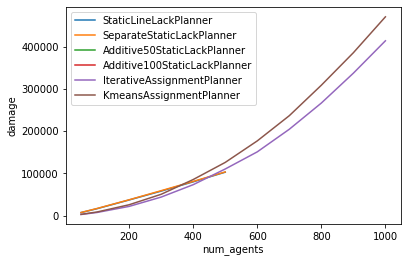

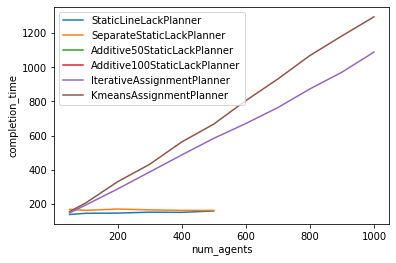

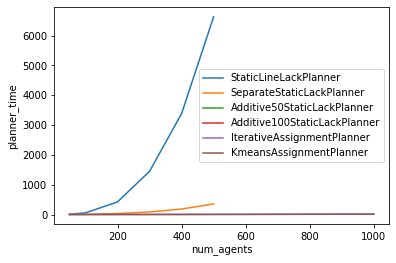

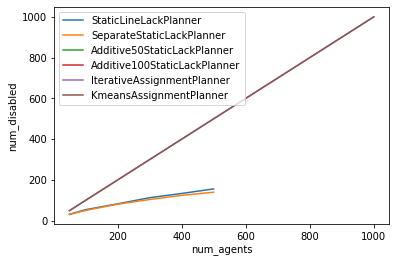

In [16]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x)
    plt.ylabel(y)

    for r in planners_results:
        plt.plot(list(r[x]),list(r[y]))

    plt.legend(planners_names)
    # plt.savefig(f'./plots/{x}-{y}.png')
    plt.show()